In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\amitk\OneDrive\Desktop\jupyter notebook\50_Startups.csv")

In [3]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
dummies = pd.get_dummies(df["State"], dtype=int)


In [6]:
marge=pd.concat([df,dummies],axis="columns")
marge.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [7]:
final=marge.drop(['State'],axis='columns')
final.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [8]:
X=final.drop(['Profit'],axis= "columns")

In [9]:
y=df.Profit

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.1)

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [12]:
reg.fit(X_train,y_train)

LinearRegression()

In [13]:
reg.score(X_test,y_test)


-1.0316648150814127

In [14]:
from sklearn.metrics import r2_score


In [15]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: -1.0316648150814127


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [18]:
print(set(y_train))


{108552.04, 107404.34, 141585.52, 132602.65, 78239.91}


Text(0, 0.5, 'Profit')

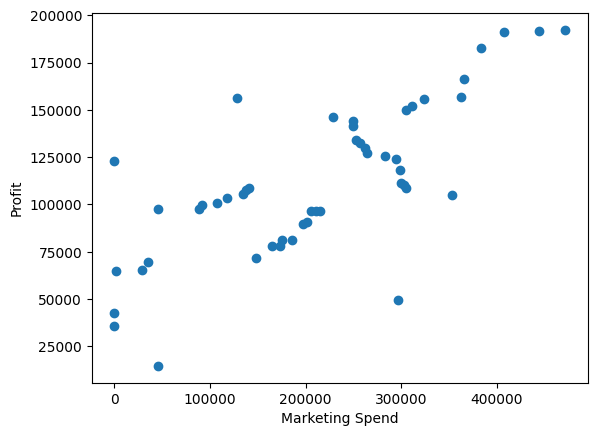

In [19]:

plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")